<a href="https://colab.research.google.com/github/sdsc-bw/DataFactory/blob/develop/model_selection/Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Model selection

There is a variety of models that can be used in machine learning like decision trees, random forests, neural networks...
Depending on the problem we have many different models to choose from. Here a small overview of the most common:

<img src="../images/model_selection.png"/>

If have labeled training data we can choose between different many different supervised methods. Whereas if we don't have the labels, the we have to use unsupervised methods like clustering.

Also according to the problem, some models fit better than others. For example, for a simple problem it makes sense to use a more simple model like a decision tree, because more complex models like neural networks can lead to overfitting. Whereas these complexe models perform better at non-linear problems. In this notebook we want to show some models and how they perform on different tasks. 

For the comparision we use different Time Series (TS) datasets. 

In [1]:
! git clone https://github.com/sdsc-bw/DataFactory.git
! ls

fatal: destination path 'DataFactory' already exists and is not an empty directory.
Der Befehl "ls" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [2]:
!pip install tsai

## Import packages

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
root = '../'

In [5]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris, load_wine, fetch_covtype
from sklearn.utils import shuffle
import sys

from util import compare_models

sys.path.insert(0, root + "codes")

from DataFactory import DataFactory

os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu
os             : Windows-10-10.0.19041-SP0
python         : 3.8.12
tsai           : 0.2.23
fastai         : 2.5.3
fastcore       : 1.3.27
torch          : 1.9.1+cpu
n_cpus         : 8
device         : cpu


## Titanic dataset

The first dataset is the [titanic dataset](https://www.kaggle.com/c/titanic-dataset/data) from kaggle. It contains the follwing information:
- __passenger_id__ unique identifier for each passenger
- __pclass__ class of the passenger  (1 = 1st; 2 = 2nd; 3 = 3rd)
- __name__ name of the passenger
- __sex__ sex of the passenger
- __age__ age of the passenger in years
- __sibsp__ number of siblings/souses aboard
- __parch__ number of parents/children aboard
- __ticket__ number of the ticket
- __fare__ passenger fare in British pound
- __cabin__ cabin of the passenger
- __embarked__ port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
- __boat__ Lifeboat
- __body__ body identification number
- __home.dest__ Home/Destination
- __survived__ wether the person survived 

In [6]:
df_titanic = pd.read_csv('../data/titanic.csv')
df_titanic = shuffle(df_titanic)

In [7]:
df_titanic.head()

,passenger_id,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,survived
422,441,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S,13,NaN,"India / Rapid City, SD",1.0
744,1302,3,"Yousif, Mr. Wazli",male,NaN,0,0,2647,7.2250,NaN,C,NaN,NaN,NaN,0.0
962,933,3,"Kink, Mr. Vincenz",male,26.0,2,0,315151,8.6625,NaN,S,NaN,NaN,NaN,NaN
1143,1107,3,"Pasic, Mr. Jakob",male,21.0,0,0,315097,8.6625,NaN,S,NaN,NaN,NaN,NaN
371,823,3,"Goldsmith, Mrs. Frank John (Emily Alice Brown)",female,31.0,1,1,363291,20.5250,NaN,S,C D,NaN,"Strood, Kent, England Detroit, MI",1.0


There we can see that there are many attributes with many missing values. As in the demo before, we have to preprocess the data.

In [8]:
datafactory = DataFactory()
dfx_titanic, dfy_titanic = datafactory.preprocess(df_titanic, y_col='survived')

2021-12-03 17:05:56,868 - DataFactory - INFO - Remove columns with NAN-values of target feature: survived
2021-12-03 17:05:56,876 - DataFactory - INFO - Start to transform the categorical columns...
2021-12-03 17:05:56,884 - DataFactory - INFO - Start with one-hot encoding of the following categoric features: ['sex', 'embarked']...
2021-12-03 17:05:56,888 - DataFactory - INFO - ...End with one-hot encoding
2021-12-03 17:05:56,889 - DataFactory - INFO - Start label encoding of the following categoric features: ['name', 'ticket', 'cabin', 'boat', 'home.dest']...
2021-12-03 17:05:56,906 - DataFactory - INFO - ...End with label encoding
2021-12-03 17:05:56,910 - DataFactory - INFO - ...End with categorical feature transformation
2021-12-03 17:05:56,911 - DataFactory - INFO - Start to clean the given dataframe...
2021-12-03 17:05:56,917 - DataFactory - INFO - Number of INF- and NAN-values are: (0, 952)
2021-12-03 17:05:56,918 - DataFactory - INFO - Set type to float32 at first && deal with 

## Load dataset: iris dataset

The second dataset is the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html) from sklearn. It contains the follwing information:
- __sepal length__ sepal length of the iris in cm
- __sepal width__ sepal width of the iris in cm
- __petal length__ petal length of the iris in cm
- __petal width__ petal width of the iris in cm
- __species__ species of the iris (0 = setosa; 1 = versicolor; 2 = virginica)

In [9]:
data = load_iris()
df_iris = pd.DataFrame(data.data, columns=data.feature_names)
df_iris['class'] = pd.Series(data.target)
df_iris = shuffle(df_iris)

In [10]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
14,5.8,4.0,1.2,0.2,0
97,6.2,2.9,4.3,1.3,1
28,5.2,3.4,1.4,0.2,0
136,6.3,3.4,5.6,2.4,2
123,6.3,2.7,4.9,1.8,2


## Load dataset: wine dataset

The third dataset is the [wine dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) from sklearn. It contains the follwing information:
- 13 features
- 3 classes

In [11]:
data = load_wine()
df_wine = pd.DataFrame(data.data, columns=data.feature_names)
df_wine['class'] = pd.Series(data.target)
df_wine = shuffle(df_wine)

In [12]:
# needs no prepocessing
df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,class
105,12.42,2.55,2.27,22.0,90.0,1.68,1.84,0.66,1.42,2.70,0.86,3.30,315.0,1
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0,0
135,12.60,2.46,2.20,18.5,94.0,1.62,0.66,0.63,0.94,7.10,0.73,1.58,695.0,2
11,14.12,1.48,2.32,16.8,95.0,2.20,2.43,0.26,1.57,5.00,1.17,2.82,1280.0,0
29,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0


## Load dataset: covertype

The fourth dataset is the [covertype dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_covtype.html) from sklearn. It contains the follwing information:
- 54 features
- 7 classes

In [13]:
data = fetch_covtype()
df_covtype = pd.DataFrame(data.data, columns=data.feature_names)
df_covtype['class'] = pd.Series(data.target)
df_covtype = shuffle(df_covtype)

In [14]:
# needs no prepocessing
df_covtype.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,class
86121,2975.0,20.0,7.0,503.0,0.0,3298.0,215.0,225.0,147.0,5850.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
99787,2984.0,321.0,13.0,366.0,57.0,4685.0,186.0,227.0,180.0,1917.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
419596,2772.0,126.0,8.0,30.0,-4.0,1680.0,235.0,234.0,131.0,2387.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
278619,2945.0,90.0,4.0,0.0,0.0,1560.0,226.0,233.0,141.0,3471.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
256786,2325.0,57.0,11.0,272.0,127.0,957.0,228.0,217.0,121.0,799.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


## Models

There are a variety of machine learning models. Now we want to present the most common models.

### Decision tree

A decision tree is one of the most simple models. Every node represents a logical rule (e.g. is feature smaller than a certain threshold). Depending on the values of the feature of the sample that is used to be classified, we look at the left or right child node. 

<img src="../images/decision_tree2.png"/>

With the DataFactory, we can select a model (e.g. a decision tree for classification) and finetune this model to achieve the best results. The algorithm builds multiple decision trees with different parameters. At the end it returns the decision tree with the best score.

### Random forest

A random forest consists of multiple different decision trees. The finale prediction is the average over the predictions of the decision trees.

<img src="../images/random_forest.png"/>

### Adaptive Boosting (AdaBoost)

Like random forest, AdaBoost uses multiple decision trees to make a prediction. But when building the decision tree, the new tree is based on the previous tree. It focuses on the samples which are predicted badly by the previous tree.

<img src="../images/adaboost.png"/>

### Gradient Boosting Decision Tree (GBDT)

Also Gradient Boosting Decision Tree (GBDT) uses multiple decision trees. But instead of averaging the predictions of the trees, their preditctions are summed. So a decision tree predicts the error of the previous tree.

<img src="../images/gbdt.png"/>

### K-Nearest Neighbour (KNN)

To classify a sample with the K-Nearest Neighbour (KNN) algorithm, we look in the proximity of the sample. So we examine what is the most frequent class of the k neigbours. The sample is then assigned to this class. 

<img src="../images/knn.png"/>

### Support Vector Machine

The Support Vector Machine (SVM) creates a hyper-plane to segregate the samples of a class. To find the best hyper-plane it tries to maximaize the the distances between nearest sample of either class. If it can't find a plane, it introduces an additional feature.

<img src="../images/svm.png"/>

### Neural Network

A neural network, also called multi layer perceptron, is one of the most powerful models. It consits of one input layer, one output layer and one or multiple hidden layers in between. Each layer consists of neurons that are connected with the previous layer by edges. After giving the data into the input layer it passes the network to the output node. If the data reaches an edge it is weighted with weight. If the data reaches a node, a bias is added to the data and an 'activation' function is applied. The output layer outputs the prediction.  

<img src="../images/neural_network.png"/>

Sometimes the performance of the neural network is worse then them of the other models. Even though, neural networks are more powerful, but if they are applied to too simple problems it might lead to overfitting. Therefor the model selection is very important.

## Comparison of the Models

Not every model fits for every problem. Here we can see the F1 scores for several models on different datasets. 

The F1 score is the harmonic mean of the precision and the recall: 
$$F1 = 2 * \frac{precision * recall}{precision + recall}$$
The higher the F1 score, the better the prediction. Precision and recall are defined as:

$$Precision = \frac{TP}{TP + FP}, Recall = \frac{TP}{TP + FN}$$
TP: True Positive, FN: False Negative, FP: False Positive

2021-12-03 17:05:57,958 - DataFactory - INFO - Remove columns with NAN-values of target feature: survived
2021-12-03 17:05:57,964 - DataFactory - INFO - Start to transform the categorical columns...
2021-12-03 17:05:57,974 - DataFactory - INFO - Start with one-hot encoding of the following categoric features: ['sex', 'embarked']...
2021-12-03 17:05:57,979 - DataFactory - INFO - ...End with one-hot encoding
2021-12-03 17:05:57,980 - DataFactory - INFO - Start label encoding of the following categoric features: ['name', 'ticket', 'cabin', 'boat', 'home.dest']...
2021-12-03 17:05:57,996 - DataFactory - INFO - ...End with label encoding
2021-12-03 17:05:57,999 - DataFactory - INFO - ...End with categorical feature transformation
2021-12-03 17:05:58,000 - DataFactory - INFO - Start to clean the given dataframe...
2021-12-03 17:05:58,008 - DataFactory - INFO - Number of INF- and NAN-values are: (0, 952)
2021-12-03 17:05:58,008 - DataFactory - INFO - Set type to float32 at first && deal with 

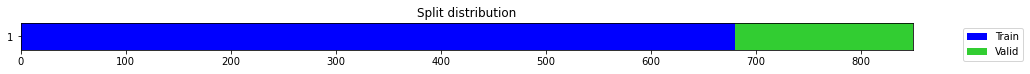

epoch,train_loss,valid_loss,accuracy,time
0,0.652512,0.686343,0.558824,00:01
1,0.642232,0.682497,0.552941,00:01
2,0.634445,0.699206,0.547059,00:01
3,0.630285,0.705285,0.552941,00:00
4,0.628546,0.701220,0.552941,00:00
5,0.624310,0.719712,0.552941,00:00
6,0.620817,0.709381,0.552941,00:00
7,0.618381,0.698328,0.558824,00:00
8,0.614820,0.702180,0.564706,00:00
9,0.611409,0.711118,0.552941,00:00


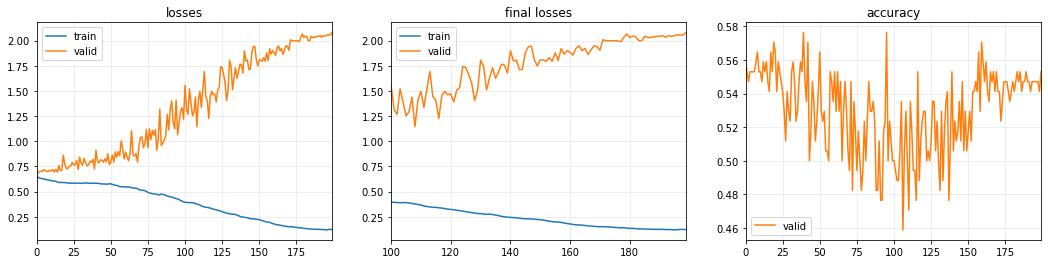

2021-12-03 17:10:01,681 - DataFactory - INFO - ...End network training
2021-12-03 17:10:01,705 - DataFactory - INFO - Remove columns with NAN-values of target feature: species
2021-12-03 17:10:01,710 - DataFactory - INFO - Start to transform the categorical columns...
2021-12-03 17:10:01,715 - DataFactory - INFO - ...End with categorical feature transformation
2021-12-03 17:10:01,716 - DataFactory - INFO - Start to clean the given dataframe...
2021-12-03 17:10:01,719 - DataFactory - INFO - Number of INF- and NAN-values are: (0, 0)
2021-12-03 17:10:01,721 - DataFactory - INFO - Set type to float32 at first && deal with INF
2021-12-03 17:10:01,722 - DataFactory - INFO - Remove columns with half of NAN-values
2021-12-03 17:10:01,723 - DataFactory - INFO - Remove constant columns
2021-12-03 17:10:01,727 - DataFactory - INFO - ...End with Data cleaning, number of INF- and NAN-values are now: (0, 0)
2021-12-03 17:10:01,728 - DataFactory - INFO - Start search for best parameters of: decision_

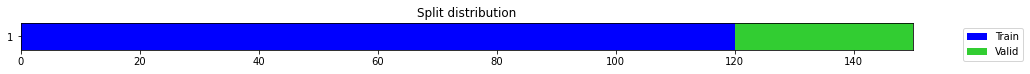

epoch,train_loss,valid_loss,accuracy,time
0,1.255435,1.240126,0.233333,00:00
1,1.222271,1.214316,0.233333,00:00
2,1.167878,1.193591,0.233333,00:00
3,1.097748,1.175617,0.233333,00:00
4,1.039274,1.161693,0.233333,00:00
5,0.956427,1.146771,0.266667,00:00
6,0.890623,1.124437,0.433333,00:00
7,0.824636,1.096202,0.566667,00:00
8,0.766998,1.060643,0.733333,00:00
9,0.710949,1.021999,0.933333,00:00


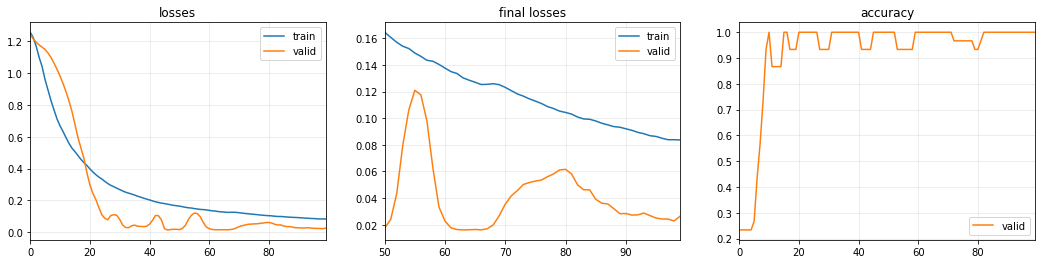

2021-12-03 17:10:28,737 - DataFactory - INFO - ...End network training
2021-12-03 17:10:28,750 - DataFactory - INFO - Remove columns with NAN-values of target feature: class
2021-12-03 17:10:28,755 - DataFactory - INFO - Start to transform the categorical columns...
2021-12-03 17:10:28,761 - DataFactory - INFO - ...End with categorical feature transformation
2021-12-03 17:10:28,762 - DataFactory - INFO - Start to clean the given dataframe...
2021-12-03 17:10:28,765 - DataFactory - INFO - Number of INF- and NAN-values are: (0, 0)
2021-12-03 17:10:28,766 - DataFactory - INFO - Set type to float32 at first && deal with INF
2021-12-03 17:10:28,768 - DataFactory - INFO - Remove columns with half of NAN-values
2021-12-03 17:10:28,774 - DataFactory - INFO - Remove constant columns
2021-12-03 17:10:28,781 - DataFactory - INFO - ...End with Data cleaning, number of INF- and NAN-values are now: (0, 0)
2021-12-03 17:10:28,782 - DataFactory - INFO - Start search for best parameters of: decision_tr

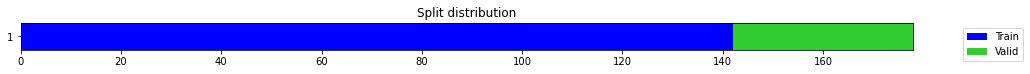

epoch,train_loss,valid_loss,accuracy,time
0,1.167973,1.123570,0.277778,00:00
1,1.117109,1.099638,0.277778,00:01
2,1.058558,1.084864,0.277778,00:00
3,1.008282,1.071504,0.472222,00:00
4,0.965445,1.054280,0.833333,00:00
5,0.927081,1.033985,0.666667,00:00
6,0.893445,1.006059,0.666667,00:00
7,0.863128,0.968657,0.666667,00:00
8,0.835011,0.919457,0.666667,00:00
9,0.812850,0.858660,0.666667,00:00


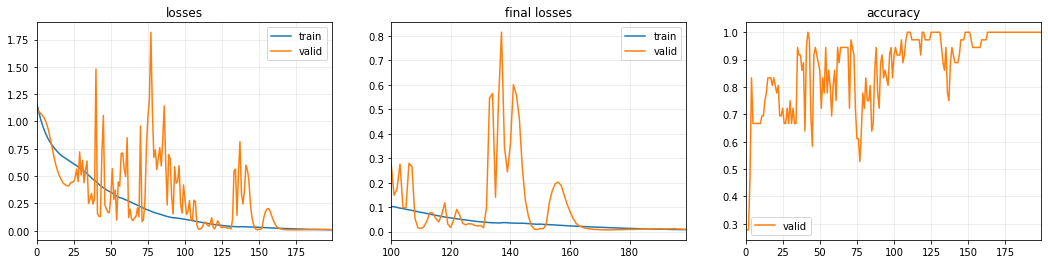

2021-12-03 17:12:36,988 - DataFactory - INFO - ...End network training
2021-12-03 17:12:38,369 - DataFactory - INFO - Remove columns with NAN-values of target feature: type
2021-12-03 17:12:38,757 - DataFactory - INFO - Start to transform the categorical columns...
2021-12-03 17:12:39,071 - DataFactory - INFO - ...End with categorical feature transformation
2021-12-03 17:12:39,095 - DataFactory - INFO - Start to clean the given dataframe...
2021-12-03 17:12:39,355 - DataFactory - INFO - Number of INF- and NAN-values are: (0, 0)
2021-12-03 17:12:39,356 - DataFactory - INFO - Set type to float32 at first && deal with INF
2021-12-03 17:12:40,276 - DataFactory - INFO - Remove columns with half of NAN-values
2021-12-03 17:12:40,551 - DataFactory - INFO - Remove constant columns
2021-12-03 17:12:41,029 - DataFactory - INFO - ...End with Data cleaning, number of INF- and NAN-values are now: (0, 0)
2021-12-03 17:12:41,084 - DataFactory - INFO - Start search for best parameters of: decision_tre

In [15]:
results = compare_models(['decision_tree', 'random_forest', 'adaboost', 'gbdt', 'svm', 'knn', 'res_net'])

This are the f1-scores of the different models on the proposed datasets (we skipped covertype dataset for the SVM, KNN and ResNet algorithm because it took to long):

In [16]:
results

,Models,Titanic Dataset,Iris Dataset,Wine Dataset,Covertype Dataset
0,Decision Tree,0.508250,0.894737,0.867706,0.936272
1,Random Forest,0.520113,0.945254,1.000000,0.952920
2,AdaBoost,0.522747,0.894737,0.955772,0.554375
3,GBDT,0.534345,0.921153,0.977712,0.777008
4,SVM,0.503528,0.973599,0.755386,0.000000
5,KNN,0.568525,0.920952,0.662905,0.000000
6,ResNet,0.552941,1.000000,1.000000,0.000000


We can see that the performance of SVM and KNN decrease with the increasing of dimensionality. For the covertype dataset we skipped the SVM and KNN algorithm because it took to long.

In [17]:
datx = [results['Models'].tolist()]
daty = [results['Titanic Dataset'].tolist(), results['Iris Dataset'].tolist(), results['Wine Dataset'].tolist(), results['Covertype Dataset'].tolist()]

Here the results as plots:

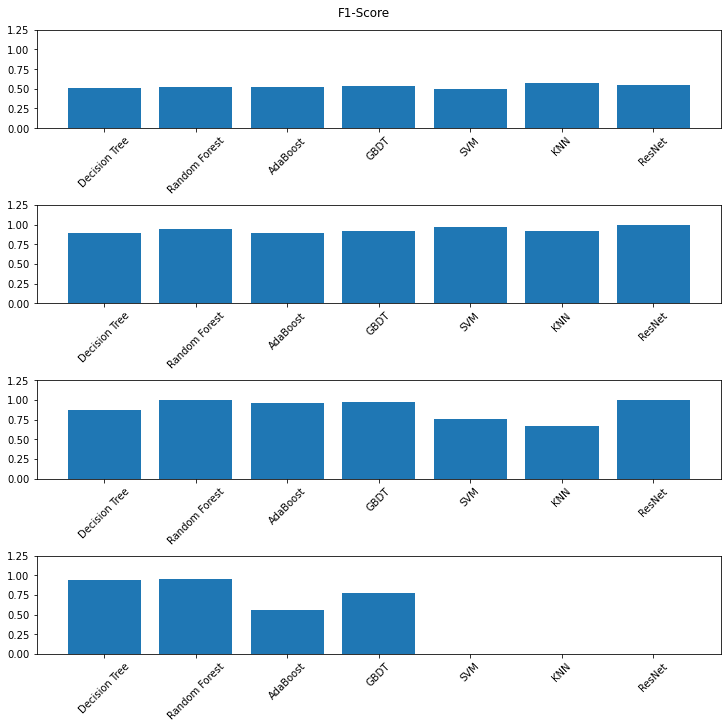

<Figure size 432x288 with 0 Axes>

In [18]:
datafactory.plot(datx, daty, ptype='bar', title='F1-Score')